In [ ]:
Маємо набір даних, який містить інформацю про стать (M -самець, F-самка) та вагу домашніх котів.
Цей набір також можна завантажити з сайту - cats_sample.csv .

In [ ]:
чтение локальных файлов

In [21]:
ga_data <- read.csv("D:/Practice/prometheus statistic/cats_sample.csv", colClasses = c("character", "numeric"))

In [23]:
## виведемо всі значення, які належать ga_data
ga_data

Sex,Bwt
M,2.2
M,2.7
F,2.2
M,3.3
M,3.1
F,2.2
M,3.9
F,2.1
M,2.2
M,3.6


In [ ]:
1. Знайдіть медіану ваги самок.

In [49]:
## створимо новий вектор даних з колонки "Bwt" з датафрейму або списку ga_data, який містить дані про вагу. 
## У фільтрованих даних залишаються лише ті значення, де колонка "Sex" має значення "F" (що, очевидно, вказує на жіночу стать).
filteredData <- ga_data$Bwt[which(ga_data$Sex=='F')]

In [52]:
sort(filteredData)

[1] 2.1 2.1 2.1 2.2 2.2 2.3 2.6

In [37]:
# Знаходжу медіану ваги самок.
median(filteredData)

[1] 2.2

In [ ]:
2. Обчисліть дисперсію ваги самок. Результат заокругліть до третього знака

In [43]:
# для обрахунку використовую функцію var для обрахунку дисперсії вибірки
var(filteredData)

[1] 0.03238095

In [ ]:
3. Знайдіть значення Q3 для ваги самок

In [ ]:
в R можна використати функції summary або quantile (вибравши лише вагу самок)

In [47]:
summary(filteredData)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.100   2.100   2.200   2.229   2.250   2.600 

In [48]:
quantile(filteredData)

0%  25%  50%  75% 100% 
2.10 2.10 2.20 2.25 2.60

In [ ]:
Відповідь: 2.25

In [ ]:
5. Чи є вага самки 2.5 кг викидом:

In [54]:
# Обчислюємо квартилі
Q1 <- quantile(filteredData, 0.25)
Q3 <- quantile(filteredData, 0.75)

# Обчислюємо міжквартильний діапазон (IQR)
IQR <- Q3 - Q1

# Визначаю верхню та нижню межі викидів
upper_limit <- Q3 + 1.5 * IQR
lower_limit <- Q1 - 1.5 * IQR

# Відфільтровую дані
outliers <- filteredData[filteredData < lower_limit | filteredData > upper_limit]

# Виводжу викиди
print(outliers)

[1] 2.6


In [55]:
# Вага самки
weight_female <- 2.5

# Перевірка, чи є вага 2.5 кг викидом
if (weight_female < lower_limit | weight_female > upper_limit) {
  print("Вага 2.5 кг є викидом.")
} else {
  print("Вага 2.5 кг не є викидом.")
}

[1] "Вага 2.5 кг є викидом."


In [56]:
#отримати потенційні викиди можна на основі критерію IQR
boxplot.stats(ga_data$Bwt[which(ga_data$Sex=='F')])

$stats
[1] 2.10 2.10 2.20 2.25 2.30

$n
[1] 7

$conf
[1] 2.110422 2.289578

$out
[1] 2.6

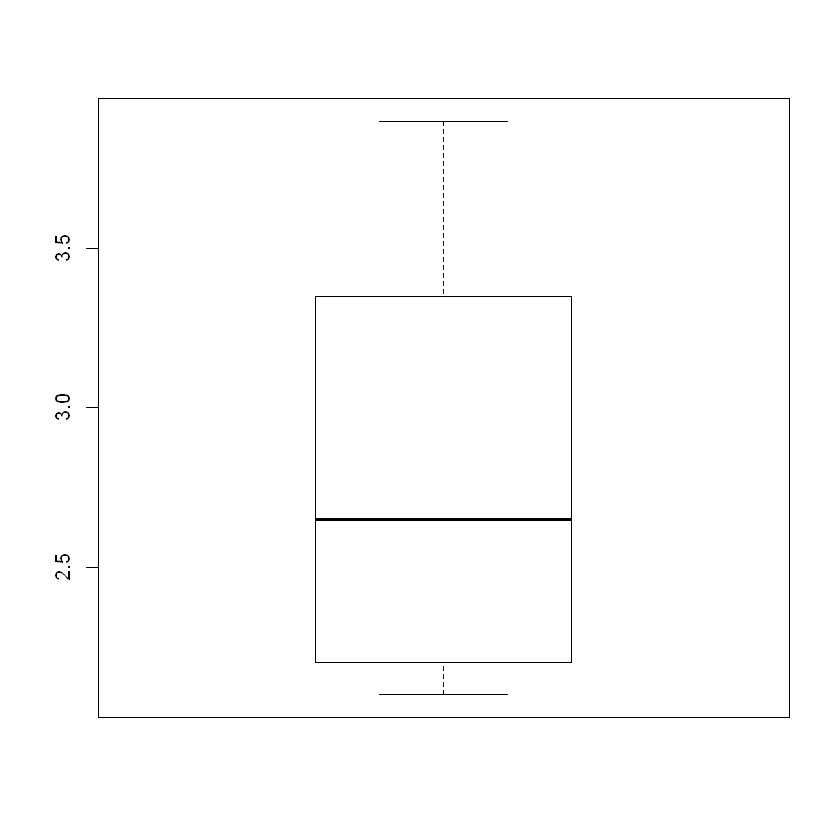

In [57]:
#або коробчатої діаграми
boxplot(ga_data$Bwt)